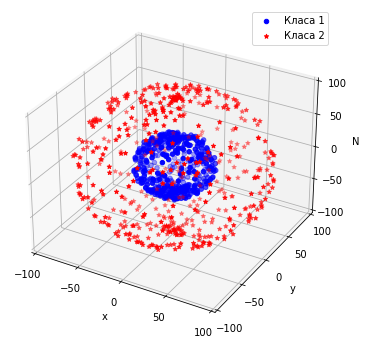

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

N = 1000
r1 = 40
r2 = 100
sigma_noise = 1

# Generišemo podatke za klasu 1
theta_1 = np.random.uniform(0, np.pi, int(N/2))
phi_1 = np.random.uniform(0, 2*np.pi, int(N/2))
x_1 = r1 * np.sin(theta_1) * np.cos(phi_1) + np.random.normal(0, sigma_noise, int(N/2))
y_1 = r1 * np.sin(theta_1) * np.sin(phi_1) + np.random.normal(0, sigma_noise, int(N/2))
z_1 = r1 * np.cos(theta_1) + np.random.normal(0, sigma_noise, int(N/2))

# Generišemo podatke za klasu 2
theta_2 = np.random.uniform(0, np.pi, int(N/2))
phi_2 = np.random.uniform(0, 2*np.pi, int(N/2))
x_2 = r2 * np.sin(theta_2) * np.cos(phi_2) + np.random.normal(0, sigma_noise, int(N/2))
y_2 = r2 * np.sin(theta_2) * np.sin(phi_2) + np.random.normal(0, sigma_noise, int(N/2))
z_2 = r2 * np.cos(theta_2) + np.random.normal(0, sigma_noise, int(N/2))

# Grafički prikaz podataka
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1, y_1, z_1, c='b', label='Класа 1')
ax.scatter(x_2, y_2, z_2, c='r', marker='*', label='Класа 2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('N')
ax.legend(loc='best')


ax.set_xlim(-100, 100)
ax.set_xticks(np.arange(-100, 150, 50))
ax.set_ylim(-100, 100)
ax.set_yticks(np.arange(-100, 150, 50))
ax.set_zlim(-100, 100)
ax.set_zticks(np.arange(-100, 150, 50))

# Čuvamo grafik kao .png sliku
plt.savefig('koncentricne_sfere.png', dpi=300, bbox_inches='tight')

plt.show()


In [2]:
# Kombinujemo podatke u jedan niz
class_1_data = np.column_stack((x_1, y_1, z_1))
class_2_data = np.column_stack((x_2, y_2, z_2))
all_data = np.vstack((class_1_data, class_2_data))

# Čuvamo podatke u .csv fajl
np.savetxt('data.csv', all_data, delimiter=',')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, SparsePCA


# Učitavamo podatke iz CSV datoteke
data = np.loadtxt('data.csv', delimiter=',')

# Standardizujemo podatke
#scaler = StandardScaler()
#scaler.fit(data)
#scaled_data = scaler.transform(data)

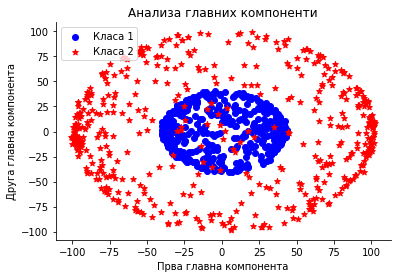

In [4]:
# Primenjujemo PCA
pca = PCA(n_components=2)  # ostavljamo broj komponenti na 2
principal_components = pca.fit_transform(data)

# Objašnjeni udeo varijanse
explained_variance_ratio = pca.explained_variance_ratio_

# plt.figure(figsize=(8, 6))  # Podešavamo veličinu grafika
# Nacrtajmo glavne komponente
plt.scatter(principal_components[:500, 0], principal_components[:500, 1], c='blue', label='Класа 1')
plt.scatter(principal_components[500:, 0], principal_components[500:, 1], c='red',  marker='*', label='Класа 2')
plt.title('Анализа главних компоненти')

# Uklonjamo gornju i desnu liniju oko grafika
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Прва главна компонента')
plt.ylabel('Друга главна компонента')
plt.legend()

# Čuvamo grafik kao .png sliku
plt.savefig('standard_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

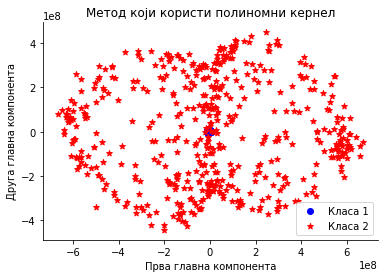

In [5]:
# Primenjujemo Polynomial Kernel PCA
kpca = KernelPCA(n_components=2, kernel='poly', degree=5)  # Postavljamo broj komponenti na 2 i koristimo polinomno jezgro sa stepenom 5
principal_components = kpca.fit_transform(data)

# Grafički prikaz glavnih komponenti
#plt.figure(figsize=(7, 5))  
plt.scatter(principal_components[:500, 0], principal_components[:500, 1], c='blue', label='Класа 1')
plt.scatter(principal_components[500:, 0], principal_components[500:, 1], c='red', marker='*', label='Класа 2')
plt.title('Метод који користи полиномни кернел')

# Uklanjamo gornju i desnu liniju oko grafika
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Прва главна компонента')
plt.ylabel('Друга главна компонента')
plt.legend(loc='best')

# Čuvamo grafik kao .png sliku
plt.savefig('poly_kernelPCA.png', dpi=300, bbox_inches='tight')

plt.show()

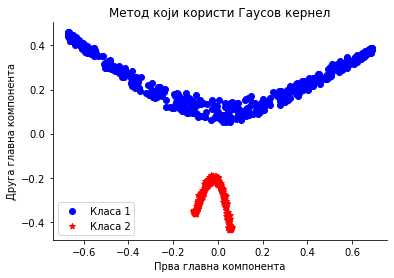

In [6]:
# Primenjujemo Gaussian Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1/(2*27**2))  # Postavljamo broj komponenti na 2 i koristimo Gausov kernel sa parametrom σ = 27
principal_components = kpca.fit_transform(data)

# Grafički prikaz glavnih komponenti
plt.scatter(principal_components[:500, 0], principal_components[:500, 1], c='blue', label='Класа 1')
plt.scatter(principal_components[500:, 0], principal_components[500:, 1], c='red',  marker='*', label='Класа 2')
plt.title('Метод који користи Гаусов кернел')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Прва главна компонента')
plt.ylabel('Друга главна компонента')
plt.legend(loc='best')

# Čuvamo grafik kao .png sliku
plt.savefig('Gaussian_kernelPCA.png', dpi=300, bbox_inches='tight')
plt.show()

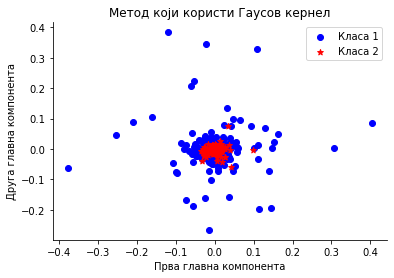

In [7]:
# Primenjujemo analizu glavnih komponenti sa kernel transformacijama
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1/(2*0.03**2))  # Postavljamo broj komponenti na 2 i koristimo Gausov kernel
principal_components = kpca.fit_transform(data)

# Grafički prikaz glavnih komponenti
plt.scatter(principal_components[:500, 0], principal_components[:500, 1], c='blue', label='Класа 1')
plt.scatter(principal_components[500:, 0], principal_components[500:, 1], c='red',  marker='*', label='Класа 2')
plt.title('Метод који користи Гаусов кернел')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Прва главна компонента')
plt.ylabel('Друга главна компонента')
plt.legend(loc='best')

# Čuvamo grafik kao .png sliku
plt.savefig('Gaussian_kernelPCA_with_gamma_003.png', dpi=300, bbox_inches='tight')
plt.show()

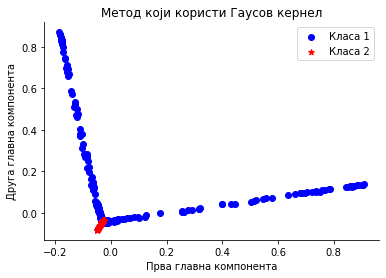

In [8]:
# Apply Gaussian Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1/(2*5**2))  # Set the number of components to 2 and use Gaussian kernel with σ = 27.8
principal_components = kpca.fit_transform(data)

# Plot the principal components
plt.scatter(principal_components[:500, 0], principal_components[:500, 1], c='blue', label='Класа 1')
plt.scatter(principal_components[500:, 0], principal_components[500:, 1], c='red',  marker='*', label='Класа 2')
plt.title('Метод који користи Гаусов кернел')

# Remove the top and right lines around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Прва главна компонента')
plt.ylabel('Друга главна компонента')
plt.legend(loc='best')

# Čuvamo grafik kao .png sliku
plt.savefig('Gaussian_kernelPCA_with_gamma_5.png', dpi=300, bbox_inches='tight')
plt.show()